In [13]:
import pandas as pd

# John Hopkins csse_covid_19_daily_reports data inconsistent

https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_daily_reports/02-04-2020.csv

versus

https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv



Lets assume `Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active`

In [14]:
sg = pd.read_csv("singapore.csv", index_col=False, parse_dates=["Last_Update"], names=["Country_Region", "Last_Update", "Lat", "Long", "Confirmed", "Deaths","Recovered","Active"])

In [15]:
sg.shape

(194, 8)

In [16]:
sg.head(3)

,Country_Region,Last_Update,Lat,Long,Confirmed,Deaths,Recovered,Active
0,Singapore,2020-08-22 04:27:49,1.2833,103.8333,56216,27.0,53651.0,2538.0
1,Singapore,2020-08-21 04:27:41,1.2833,103.8333,56099,27.0,53119.0,2953.0
2,Singapore,2020-08-20 04:27:43,1.2833,103.8333,56031,27.0,52810.0,3194.0


In [17]:
sg.Deaths

0      27.0
1      27.0
2      27.0
3      27.0
4      27.0
       ... 
189     NaN
190     NaN
191     NaN
192     NaN
193     NaN
Name: Deaths, Length: 194, dtype: float64

In [18]:
sg.dtypes

Country_Region            object
Last_Update       datetime64[ns]
Lat                      float64
Long                     float64
Confirmed                  int64
Deaths                   float64
Recovered                float64
Active                   float64
dtype: object

In [19]:
import matplotlib.pyplot as plt

# Howto plot with mathplot lib

<https://discourse.matplotlib.org/t/gnuplot-to-matplotlib-time-series/21496/2>

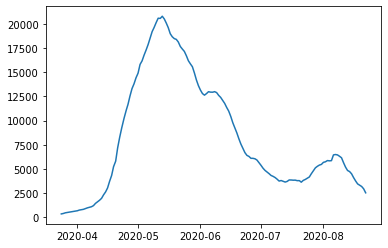

In [20]:
plt.plot("Last_Update", "Active", data=sg)